### **Nomor 1.4**

In [11]:
import simpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def mobil(env, parkiran, nama, rng, logs):
     # Laju kedatangan rata-rata 1 mobil per jam
    waktu_kedatangan = rng.exponential(1) 
    yield env.timeout(waktu_kedatangan)
    datang = env.now
    print(f"{nama} datang pada waktu: {datang:.2f} jam")

    with parkiran.request() as req:
        yield req
        # Waktu parkir rata-rata 4 jam, deviasi standar 1 jam
        waktu_parkir = max(0, rng.normal(4, 1))  
        yield env.timeout(waktu_parkir)
        pergi = env.now
        print(f"{nama} pergi pada waktu: {pergi:.2f} jam")
        logs.append({'Nama': nama, 'Waktu Datang': datang, 'Waktu Pergi': pergi, 'Lama parkir': pergi - datang})

def simulasi(env, num_mobil, rng, logs):
    parkiran = simpy.Resource(env, capacity=3)  

    # Membuat beberapa mobil di parkiran
    for i in range(num_mobil):
        env.process(mobil(env, parkiran, f'Mobil {i}', rng, logs))

### **Menjalankan Proses Simulasi**

In [13]:
env = simpy.Environment()
rng = np.random.default_rng() 
logs = []  
num_mobil = 10  
simulasi(env, num_mobil, rng, logs)
env.run(until=24)

Mobil 5 datang pada waktu: 0.07 jam
Mobil 9 datang pada waktu: 0.08 jam
Mobil 8 datang pada waktu: 0.13 jam
Mobil 7 datang pada waktu: 0.19 jam
Mobil 6 datang pada waktu: 0.30 jam
Mobil 4 datang pada waktu: 0.78 jam
Mobil 0 datang pada waktu: 1.14 jam
Mobil 1 datang pada waktu: 1.43 jam
Mobil 3 datang pada waktu: 2.34 jam
Mobil 2 datang pada waktu: 2.34 jam
Mobil 9 pergi pada waktu: 3.75 jam
Mobil 5 pergi pada waktu: 4.64 jam
Mobil 8 pergi pada waktu: 4.78 jam
Mobil 7 pergi pada waktu: 7.00 jam
Mobil 4 pergi pada waktu: 8.11 jam
Mobil 6 pergi pada waktu: 9.33 jam
Mobil 0 pergi pada waktu: 10.38 jam
Mobil 1 pergi pada waktu: 11.37 jam
Mobil 3 pergi pada waktu: 13.23 jam
Mobil 2 pergi pada waktu: 15.62 jam


### **Print Data dengan Pandas**

In [14]:
df = pd.DataFrame(logs)
df.sort_values(by='Nama', inplace=True)
print(df)

      Nama  Waktu Datang  Waktu Pergi  Lama parkir
6  Mobil 0      1.137029    10.383614     9.246585
7  Mobil 1      1.434577    11.367279     9.932702
9  Mobil 2      2.340071    15.620854    13.280783
8  Mobil 3      2.336585    13.230222    10.893637
4  Mobil 4      0.776841     8.107554     7.330712
1  Mobil 5      0.065456     4.635499     4.570043
5  Mobil 6      0.299959     9.331782     9.031823
3  Mobil 7      0.185329     6.998985     6.813656
2  Mobil 8      0.134283     4.784170     4.649887
0  Mobil 9      0.081802     3.750700     3.668898


### **Hasil Visualisasi Data**

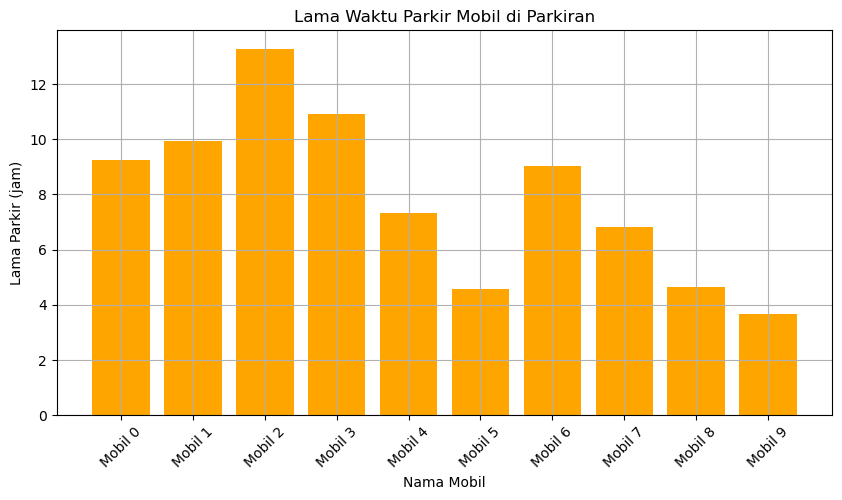

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(df['Nama'], df['Lama parkir'], color='orange')
plt.xlabel('Nama Mobil')
plt.xticks(rotation=45)
plt.ylabel('Lama Parkir (jam)')
plt.title('Lama Waktu Parkir Mobil di Parkiran')
plt.grid(True)
plt.show()